In [1]:
from ugradio.dft import dft, idft
import numpy as np
import matplotlib.pylab as plt

In [2]:
pwd = '/home/zoeko/astro121lab/lab1/data_sec7/'

def freq_to_period(freq):
    '''take frequency (in kHz)
    and converts to period (in microseconds)'''
    return (1/freq) * 1000

# 7.1: DSB Mixer

$\nu_{sample} = 3200$ kHz \
Anti-aliasing filter OFF \
6 dB attenuator

Inputs:
$\nu_{LO} = 160$ MHz
$\nu_{RF} = 167.4$ MHz

Data fname: dsb_3200_1.npy

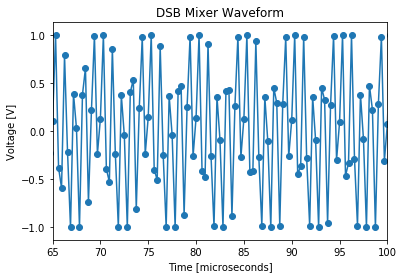

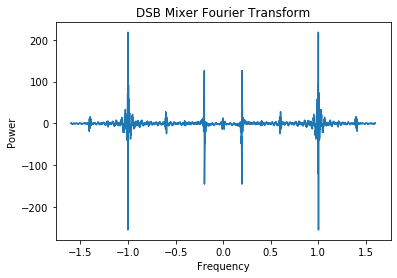

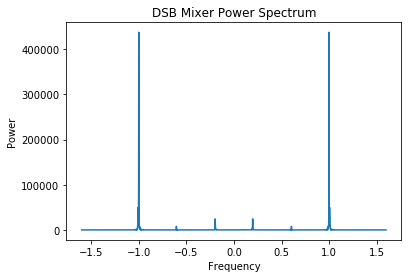

In [86]:
freq = 3200
fname = f'{pwd}dsb_3200_1.npy'
data = np.load(fname)[0]
time = np.arange(len(data)) * freq_to_period(freq) # in microseconds

plt.figure()
plt.plot(time, data)
plt.scatter(time, data)
plt.xlim(65, 100)
plt.title('DSB Mixer Waveform')
plt.xlabel('Time [microseconds]')
plt.ylabel('Voltage [V]')
plt.show()

f, Fx = dft(data, vsamp=freq/1000)

plt.figure()
plt.plot(f, Fx)
plt.title('DSB Mixer Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

plt.figure()
plt.plot(f, np.abs(Fx)**2)
plt.title('DSB Mixer Power Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

plt.figure()
plt.plot(f, np.abs(Fx)**2)
plt.title('DSB Mixer Power Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Power (log)')
plt.show()

In [64]:
def zeroer(start: float, end: float, data: np.ndarray):
    assert start >= 0
    assert end >= 0

    size = len(data)
    mult_arr = np.zeros(size)
    if start <= 1:
        start = int(start * size)
    if end <= 1:
        end = int(end * size)
    mult_arr[start:end] = 1
    return data.copy() * mult_arr

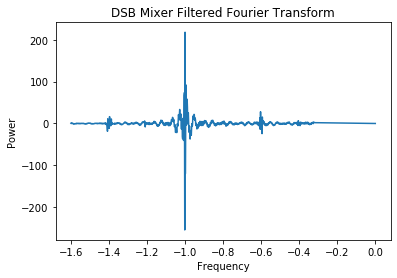

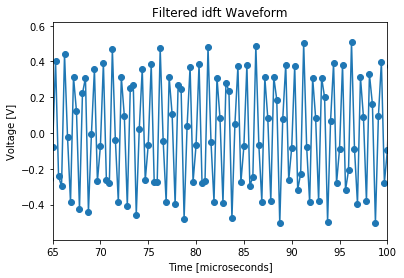

In [92]:
f, Fx = dft(data, vsamp=freq/1000)

low = 0
high = .4
f = zeroer(low, high, f)
Fx = zeroer(low, high, Fx)

plt.figure()
plt.plot(f, Fx)
plt.title('DSB Mixer Filtered Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

fi, Fxi = idft(Fx, f, vsamp=freq/1000)
plt.figure()
plt.plot(fi, Fxi)
plt.scatter(fi, Fxi)
plt.xlim(65, 100)
plt.title('Filtered idft Waveform')
plt.xlabel('Time [microseconds]')
plt.ylabel('Voltage [V]')
plt.show()